In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

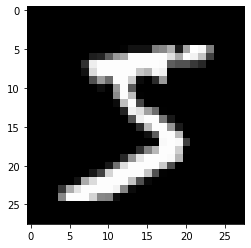

In [5]:
plt.imshow(x_train[0], cmap='gray')

In [6]:
print(y_train[0])

5


7


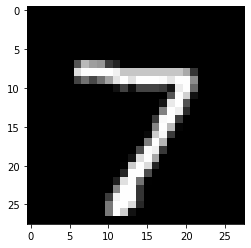

In [7]:
plt.imshow(x_test[0], cmap='gray')
print(y_test[0])

In [8]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [9]:
#Conv2D(filters, kernal_size=3, activation='relu')
#Flatten
#Dense(neurons, activation)

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1   = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.dense1  = Dense(128, activation='relu')
        self.dense2  = Dense(10, activation='softmax')
        
    def call(self, x):
        x1 = self.conv1(x)
        x2 = self.flatten(x1)
        x3 = self.dense1(x2)
        return self.dense2(x3)
 
model = MNISTModel()

In [10]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer     = tf.keras.optimizers.Adam()

In [11]:
train_loss     = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy') 

In [12]:
test_loss     = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [13]:
@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(outputs, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(outputs, predictions)   

In [14]:
@tf.function
def test_step(inputs, outputs):
    predictions = model(inputs)
    loss = loss_function(outputs, predictions)
    
    test_loss(loss)
    test_accuracy(outputs, predictions)

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0 

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [16]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [17]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_data  = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [18]:
epochs = 5

for epoch in range(epochs):
    for train_inputs, train_labels in train_data:
        train_step(train_inputs, train_labels)
    for test_inputs, test_labels in test_data:
        test_step(test_inputs, test_labels)
        
    template = 'Epochs: {}, Trains loss: {}, Train accuracy: {}. Test loss: {}, Test accuaracy: {}'
    print(template.format(
        epoch + 1,
        train_loss.result(),
        train_accuracy.result(),
        test_loss.result(),
        test_accuracy.result()))
          
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

epoch :0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch1 :0
Epochs: 1, Trains loss: 0.13443109393119812, Train accuracy: 0.9593166708946228. Test loss: 0.07436816394329071, Test accuaracy: 0.9768999814987183
epoch :1
epoch1 :1
Epochs: 2, Trains loss: 0.042747046798467636, Train accuracy: 0.9867333173751831. Test loss: 0.05967937782406807, Test accuaracy: 0.98089998960495
epoch :2
epoch1 :2
Epochs: 3, Trains loss: 0.022094443440437317, Train accuracy: 0.992816686630249. Test loss: 0.06451397389173508, Test accuaracy: 0.9803000092506409
epoch :3